In [1]:
import imageio
import joblib as jlb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus as pdp
import seaborn as sbn
import os

from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

In [2]:
# C·∫•u h√¨nh ƒë∆∞·ªùng d·∫´n
folder = "../"
output_dir = folder + "Output"

# T·∫°o th∆∞ m·ª•c n·∫øu ch∆∞a c√≥
os.makedirs(output_dir, exist_ok=True)

In [3]:
# ƒê·ªçc d·ªØ li·ªáu
data = pd.read_excel(folder + '../Data/Iris.xls')
print(data.head())
print("=========================================================")
print(data.info())

   sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
# Chu·∫©n b·ªã d·ªØ li·ªáu
x = data.drop('iris', axis=1)
print(x.head())

print("=======================================================")

y = data.iris
print(y.head())

print("=======================================================")

print("C√°c nh√£n (classes):", y.unique())

   sepallength  sepalwidth  petallength  petalwidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: iris, dtype: object
C√°c nh√£n (classes): ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
# Chia train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
print(f"Train: {x_train.shape}, Test: {x_test.shape}")

Train: (120, 4), Test: (30, 4)


In [10]:
# X√¢y d·ª±ng m√¥ h√¨nh Decision Tree (gi·ªØ tham s·ªë m·∫∑c ƒë·ªãnh)
clf = DecisionTreeClassifier()
model = clf.fit(x_train, y_train)

# L∆∞u m√¥ h√¨nh
mdl_path = os.path.join(output_dir, 'DecisionTree_Iris.mdl')
jlb.dump(model, mdl_path)
print(f"ƒê√£ l∆∞u m√¥ h√¨nh: {mdl_path}")

ƒê√£ l∆∞u m√¥ h√¨nh: ../Output\DecisionTree_Iris.mdl


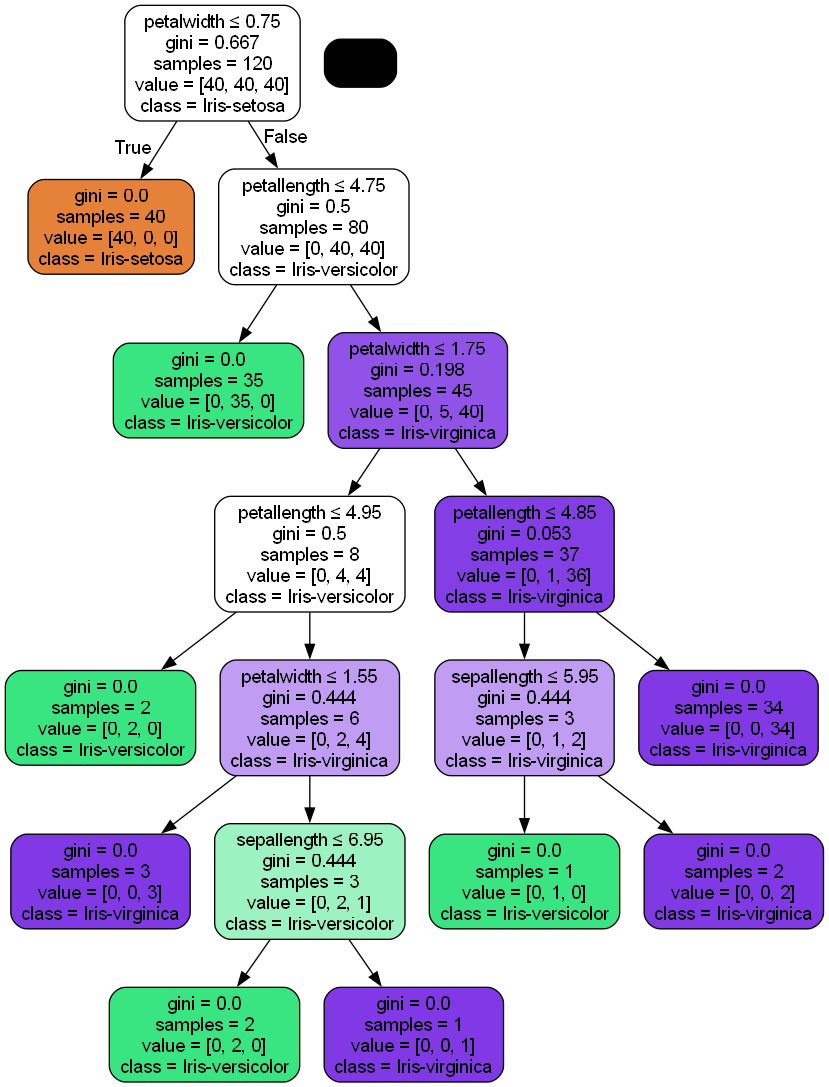

In [7]:
# ----------------------------------------------------------
# 5. Xu·∫•t & hi·ªÉn th·ªã c√¢y quy·∫øt ƒë·ªãnh (graphviz + pydotplus)
# ----------------------------------------------------------
dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=x.columns,
    class_names=np.unique(y).astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pdp.graph_from_dot_data(dot_data)

png_path = os.path.join(output_dir, "DecisionTree_Iris.png")
pdf_path = os.path.join(output_dir, "DecisionTree_Iris.pdf")

# ghi file
graph.write_png(png_path)
graph.write_pdf(pdf_path)

# (T√πy m√¥i tr∆∞·ªùng, Image(...) c√≥ th·ªÉ hi·ªÉn th·ªã trong notebook)
try:
    display(Image(graph.create_png()))
except Exception:
    print(f"ƒê√£ xu·∫•t c√¢y xu·ªëng: {png_path} v√† {pdf_path}")


=== üîç ƒê√ÅNH GI√Å M√î H√åNH Decision Tree (Iris) ===
Accuracy            : 96.67%
Precision (macro)   : 96.97%
Recall (macro)      : 96.67%
F1-score (macro)    : 96.66%

=== üìä B√°o c√°o chi ti·∫øt ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


Ma tr·∫≠n nh·∫ßm l·∫´n:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


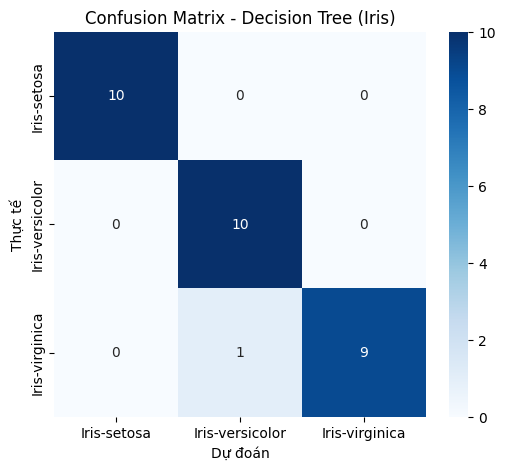

In [8]:
# ----------------------------------------------------------
# 6. D·ª± ƒëo√°n tr√™n t·∫≠p test v√† ƒë√°nh gi√° (gi·ªëng KNN tr∆∞·ªõc ƒë√≥)
# ----------------------------------------------------------
y_pred = model.predict(x_test)

# C√°c ch·ªâ s·ªë chung (d√πng average='macro' cho ƒëa l·ªõp)
scores = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision (macro)': precision_score(y_test, y_pred, average='macro'),
    'Recall (macro)': recall_score(y_test, y_pred, average='macro'),
    'F1-score (macro)': f1_score(y_test, y_pred, average='macro')
}

print("\n=== üîç ƒê√ÅNH GI√Å M√î H√åNH Decision Tree (Iris) ===")
for name, val in scores.items():
    print(f"{name:20s}: {val*100:.2f}%")

print("\n=== üìä B√°o c√°o chi ti·∫øt ===")
print(classification_report(y_test, y_pred))

# Ma tr·∫≠n nh·∫ßm l·∫´n
cm = confusion_matrix(y_test, y_pred)
print("\nMa tr·∫≠n nh·∫ßm l·∫´n:\n", cm)

plt.figure(figsize=(6,5))
sbn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Decision Tree (Iris)')
plt.xlabel('D·ª± ƒëo√°n')
plt.ylabel('Th·ª±c t·∫ø')
plt.show()



Feature importances:
 petalwidth     0.553453
petallength    0.413213
sepallength    0.033333
sepalwidth     0.000000
dtype: float64


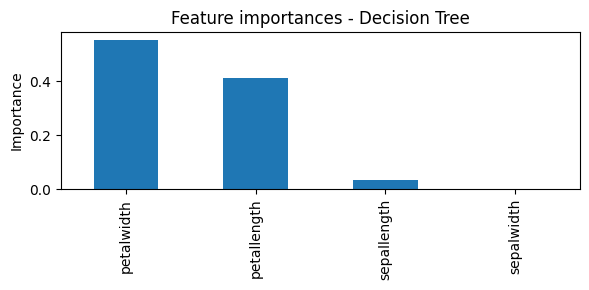

In [ ]:
# Feature Importances
fi = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
print("\nFeature importances:\n", fi)

plt.figure(figsize=(6,3))
fi.plot(kind='bar')
plt.title('Feature importances - Decision Tree')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

C:\Users\Phu\AppData\Local\Temp\ipykernel_18252\241549063.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  photo = imageio.imread(png_path)


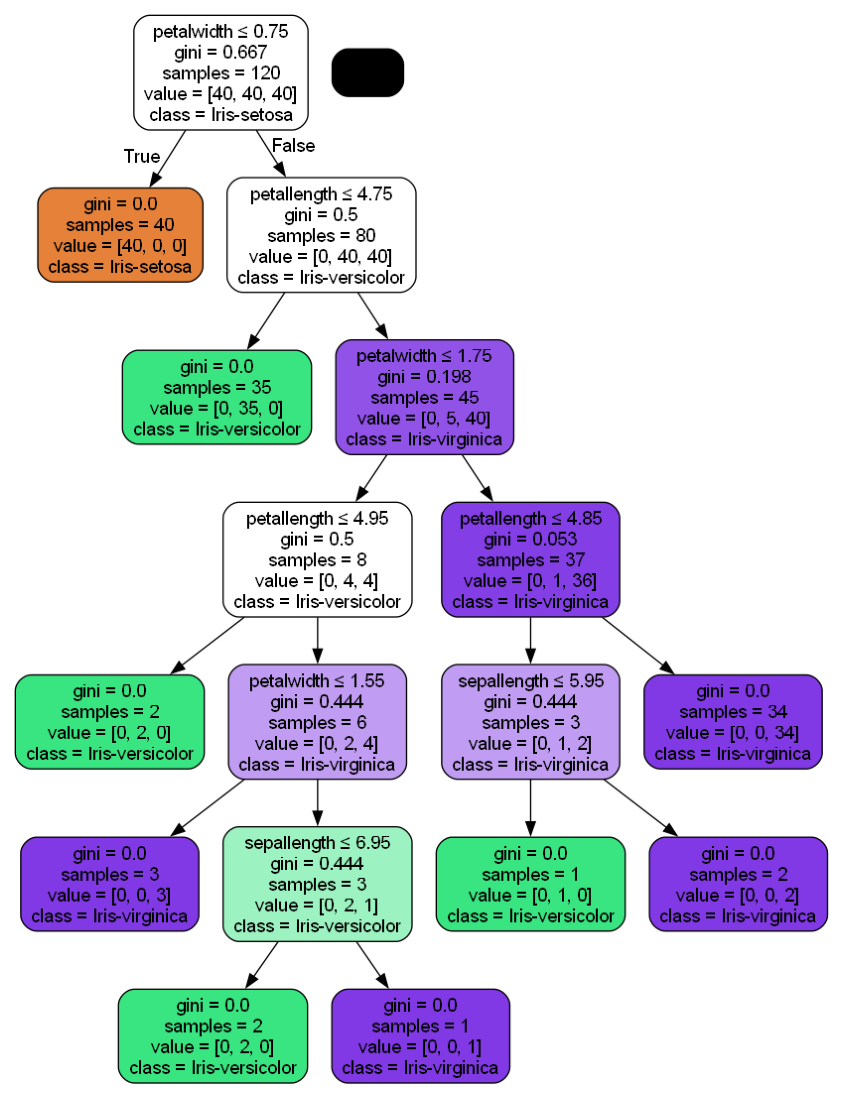

In [10]:
# Hi·ªÉn th·ªã ·∫£nh c√¢y (n·∫øu file ƒë∆∞·ª£c t·∫°o) ƒë·ªÉ ƒë·∫£m b·∫£o c√≥ output
if os.path.exists(png_path):
    photo = imageio.imread(png_path)
    plt.figure(figsize=(14,14))
    plt.imshow(photo)
    plt.axis('off')
    plt.show()

In [11]:
# ----------------------------------------------------------
# 9. V√≤ng l·∫∑p t∆∞∆°ng t√°c d·ª± ƒëo√°n m·∫´u ƒë∆°n l·∫ª (gi·ªØ giao di·ªán gi·ªëng ban ƒë·∫ßu)
# ----------------------------------------------------------
labels = np.unique(y)  # ['Iris-setosa', ...]
model_load = jlb.load(mdl_path)

tiep = 'C'
while (tiep.upper() == 'C'):
    try:
        idx = int(input(f'Nh·∫≠p ch·ªâ s·ªë d√≤ng t·ª´ 0 ƒë·∫øn {len(x_test)-1} (ho·∫∑c -1 ƒë·ªÉ tho√°t): '))
        if idx == -1:
            break
        idx = idx % len(x_test)
        X_new = x_test.iloc[[idx]]
        y_pred_single = model_load.predict(X_new)
        print('M·∫´u', X_new.to_string(), '    ƒë∆∞·ª£c d·ª± ƒëo√°n l√†', y_pred_single)
    except Exception as ex:
        print("L·ªói nh·∫≠p li·ªáu ho·∫∑c ngo·∫°i l·ªá:", ex)
    tiep = input('Ti·∫øp t·ª•c (C/K) ? ')

M·∫´u     sepallength  sepalwidth  petallength  petalwidth
11          4.8         3.4          1.6         0.2     ƒë∆∞·ª£c d·ª± ƒëo√°n l√† ['Iris-setosa']
